In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


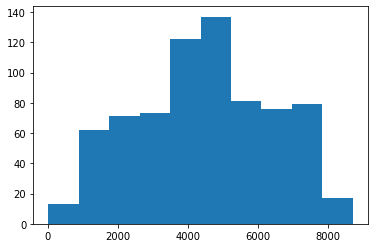

In [5]:
plt.hist(data['cnt'],bins=10)
plt.show()

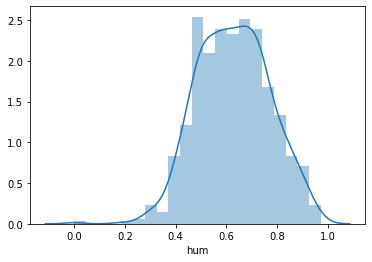

In [6]:
sns.distplot(data['hum'])

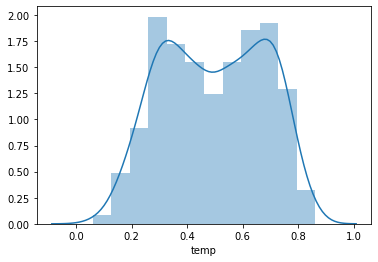

In [7]:
sns.distplot(data['temp'])

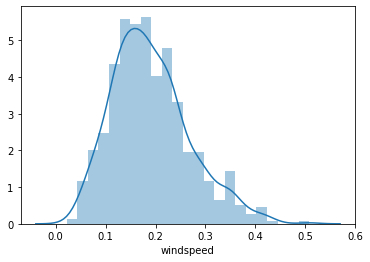

In [8]:
sns.distplot(data['windspeed'])

In [9]:
data['mnth']=data['mnth'].astype('category')
data['holiday']=data['holiday'].astype('category')
data['season']=data['season'].astype('category')
data['yr']=data['yr'].astype('category')
data['weekday']=data['weekday'].astype('category')
data['workingday']=data['workingday'].astype('category')
data['weathersit']=data['weathersit'].astype('category')


In [10]:
d1=data['dteday']
for i in range(0,len(d1)):
    d1[i]=datetime.datetime.strptime(d1[i],'%Y-%m-%d').strftime('%d')
data['dteday']=d1
data['dteday']=data['dteday'].astype('category')
data=data.drop(['casual','registered','instant'],axis=1)

In [11]:
X=data.iloc[:, :-1]
y=data.iloc[:,11]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [12]:
cnames=['temp','hum','windspeed']

In [19]:
hum=go.Histogram(
        x=data['hum'],name='humidity')
temp=go.Histogram(
        x=data['temp'],name='temperature')
windspeed=go.Histogram(
        x=data['windspeed'],name='windspeed')
py.iplot([hum,temp,windspeed])

In [20]:
temp=go.Box(
x=data['temp'],name='temp'
)
hum=go.Box(
x=data['hum'],name='hum'
)
windspeed=go.Box(
x=data['windspeed'],name='windspeed'
)
py.iplot([temp,hum,windspeed])

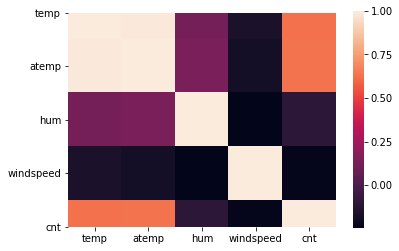

In [21]:
sns.heatmap(data.corr(),square=True)

In [22]:
data=data.drop(['atemp'],axis=1)

<b>SVR MODEL</b>

In [23]:
svregressor=SVR()
svregressor.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
Sy_pred=svregressor.predict(X_test)

In [25]:
#defining MAPE function
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [26]:
MAPE(y_test,Sy_pred)

45.538475446504265

In [27]:
mean_squared_error(y_test,Sy_pred)

0.005784955527997941

<b>Grid Search CV for HyperParameter Tuning</b>

In [28]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C': [1,10,100,1000],'kernel':['rbf','linear'],'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
modelsvr=SVR()
grid_search=GridSearchCV(estimator=svregressor,
                         param_grid=parameters,
                         cv=5,
                         n_jobs=-1)
grid_search=grid_search.fit(X_train,y_train)

C:\Users\venkata.dk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [40]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.5028397245915376


In [41]:
svr=SVR(C= 1000, gamma= 0.1, kernel= 'linear')

In [42]:
svr.fit(X_train,y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
y_pred=svr.predict(X_test)

In [44]:
MAPE(y_test,y_pred)

32.555723179786725

In [45]:
mean_squared_error(y_test,y_pred)

0.0024092847295514117